In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'Price (€)': [17, 18, 19, 20, 21, 22, 23, 24],
    'Too Expensive': [6, 13, 16, 28, 29, 46, 49, 38],
    'Too Cheap': [25, 40, 48, 41, 32, 20, 13, 6]
}

df = pd.DataFrame(data)

# Total respondents (sum of "Too Expensive" responses)
total_respondents = df['Too Expensive'].sum()

# Calculate % Too Expensive and % Too Cheap
df['% Too Expensive'] = (df['Too Expensive'] / total_respondents) * 100
df['% Too Cheap'] = (df['Too Cheap'] / total_respondents) * 100

# Compute cumulative percentages
df['Cumulative Too Expensive'] = df['% Too Expensive'].cumsum()

# Compute Cumulative Too Cheap correctly (from bottom to top)
df['Cumulative Too Cheap'] = df['% Too Cheap'][::-1].cumsum()[::-1]

# Display the corrected table
df

   Price (€)  Too Expensive  Too Cheap  % Too Expensive  % Too Cheap  \
0         17              6         25         2.666667    11.111111   
1         18             13         40         5.777778    17.777778   
2         19             16         48         7.111111    21.333333   
3         20             28         41        12.444444    18.222222   
4         21             29         32        12.888889    14.222222   
5         22             46         20        20.444444     8.888889   
6         23             49         13        21.777778     5.777778   
7         24             38          6        16.888889     2.666667   

   Cumulative Too Expensive  Cumulative Too Cheap  
0                  2.666667            100.000000  
1                  8.444444             88.888889  
2                 15.555556             71.111111  
3                 28.000000             49.777778  
4                 40.888889             31.555556  
5                 61.333333            

In [2]:
# Compute absolute difference
df['Difference'] = abs(df['Cumulative Too Expensive'] - df['Cumulative Too Cheap'])

# Find the row with the smallest difference
opp_row = df.loc[df['Difference'].idxmin()]
optimal_price = opp_row['Price (€)']

print(f"\nOptimal Price Point (OPP) is approximately: {optimal_price}€")



Optimal Price Point (OPP) is approximately: 21.0€


In [3]:
# Threshold for acceptable range
threshold = 60

# Find PMC: First price where Cumulative Too Cheap is ≤ 60%
pmc_row = df[df['Cumulative Too Cheap'] <= threshold].iloc[0]
pmc = pmc_row['Price (€)']

# Find PME: First price where Cumulative Too Expensive is ≥ 60%
pme_row = df[df['Cumulative Too Expensive'] >= threshold].iloc[0]
pme = pme_row['Price (€)']

print(f"\nAcceptable Price Range: {pmc}€ to {pme}€")



Acceptable Price Range: 20.0€ to 22.0€


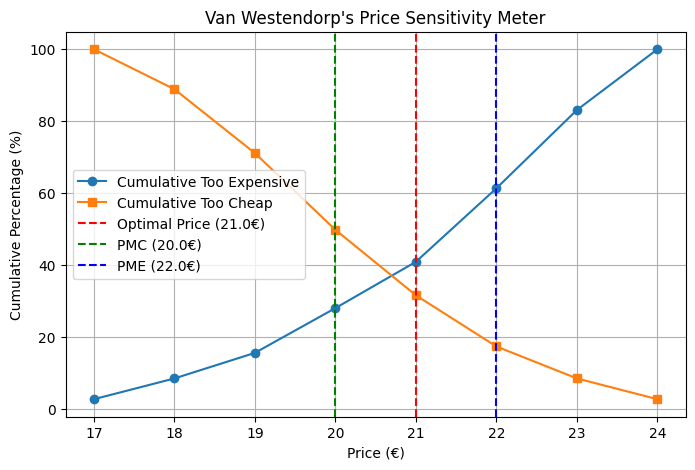

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# Plot the cumulative curves
plt.plot(df['Price (€)'], df['Cumulative Too Expensive'], label="Cumulative Too Expensive", marker='o')
plt.plot(df['Price (€)'], df['Cumulative Too Cheap'], label="Cumulative Too Cheap", marker='s')

# Highlight OPP
plt.axvline(optimal_price, linestyle="--", color="red", label=f"Optimal Price ({optimal_price}€)")
plt.axvline(pmc, linestyle="--", color="green", label=f"PMC ({pmc}€)")
plt.axvline(pme, linestyle="--", color="blue", label=f"PME ({pme}€)")

# Labels and legend
plt.xlabel("Price (€)")
plt.ylabel("Cumulative Percentage (%)")
plt.title("Van Westendorp's Price Sensitivity Meter")
plt.legend()
plt.grid()

plt.show()


In [5]:
df

,Price (€),Too Expensive,Too Cheap,% Too Expensive,% Too Cheap,Cumulative Too Expensive,Cumulative Too Cheap,Difference
0,17,6,25,2.666667,11.111111,2.666667,100.000000,97.333333
1,18,13,40,5.777778,17.777778,8.444444,88.888889,80.444444
2,19,16,48,7.111111,21.333333,15.555556,71.111111,55.555556
3,20,28,41,12.444444,18.222222,28.000000,49.777778,21.777778
4,21,29,32,12.888889,14.222222,40.888889,31.555556,9.333333
5,22,46,20,20.444444,8.888889,61.333333,17.333333,44.000000
6,23,49,13,21.777778,5.777778,83.111111,8.444444,74.666667
7,24,38,6,16.888889,2.666667,100.000000,2.666667,97.333333
